<a href="https://colab.research.google.com/github/Shantanu9326/Banking-Marketing-Campaign-with-Spark/blob/master/Banking_Marketing_Campaign_with_pySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:**

- Names:
KISAN KUMAR BEHERA,
DISHA NAYAK,
SHANTANU GUPTA

- Student IDs: 
218465331, 
218017796,
218200234

- Emails:
kbehera@deakin.edu.au ,
knayak@deakin.edu.au,
guptasha@deakin.edu.au


---

# Import Spark

In [0]:
#INSTALLING SPARK AND PIP PACKAGES
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
#IMPORTING SPARK SESSION
import findspark
findspark.init()
from pyspark.sql import SparkSession 
from pyspark.sql import SQLContext 

# Read & Check data

In [0]:
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [0]:
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [0]:
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

#IMPORTING BANK DATASET AS A SPARK DATA FRAME
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 

#SUMMARISING EACH COLUMN VALUES
df.summary().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

In [0]:
# CHECKING DATA DISTRIBUTION
df.printSchema() 
df.show(5) 

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

# Select features

In [0]:
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2=df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
df2.show(5)
cols=df2.columns

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|       2|   -1|       0| unknown|    yes|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
only showing top 5 rows



In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SQL').getOrCreate()

#REGISTERING DF2 AS SQL TABLE NAMED "BANK"
df2.registerTempTable("bank") 

#FILTERING UNKNOWN VALUES USING FROM ALL THE COLUMNS USING "AND" "OR" LOGIC USING SPARKSQL
sqlfilter=spark.sql("SELECT * FROM bank WHERE job!='unknown' AND education!='unknown' AND marital!='unknown' AND loan!='unknown' AND (poutcome == 'failure' OR poutcome == 'success')")

In [0]:
#STORING IN NEW VARIABLE TO AVOID 'NONETYPE ERROR'
df2=sqlfilter

In [0]:
#DISPLAYING AND SUMMARIZING NEW DATA FRAME
df2.show()
df2.summary().show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

In [0]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

In [0]:
#SELECTING CATEGORICAL COLUMNS ONLY
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

#CREATING AN EMPTY LIST FOR PIPELINE AND ASSEMBLER
stages = []

In [0]:
#APPLYING FOR LOOP TO INDEX AND ENCODE ALL THE SELECTED COLUMNS
#APPLYING STRING INDEXER TO ALL THE CATEGORICAL COLUMNS AND STORING IT IN A NEW COLUMN WITH +INDEXED
#APPLYING ONE HOT ENCODER TO ALL THE INDEXED COLUMNS AND STORING IT IN A NEW COLUMN WITH +ENCODED

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + '_indexed')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "_encoded"])
    stages += [stringIndexer, encoder]
    
#INDEXING PREDICTOR COLUMN 'DEPOSIT' AS LABEL AND FEATURES    
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')

#CREATING STAGES FOR BOTH NUMERICAL AND CATEGORICAL COLUMNS
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'campaign', 'pdays', 'previous']

#ADDING BOTH TI ASSEMBLER
assemblerInputs = [c + "_encoded" for c in categoricalColumns] + numericCols

#VECTORIZING TO CREATE A NEW FEATURES COLUMN WITH INDEXED AND ENCODED VALUES
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


In [0]:
from pyspark.ml import Pipeline

In [0]:
#COMBINING ALL THE STAGES INTO ONE, FITTING DF2 AND TRANSFORMING IT

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)


In [0]:
#STORING IN NEW VARIABLE TO AVOID 'NONETYPE ERROR'
df3=df2

In [0]:
df3.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+------

In [0]:
#ADDING ALL THE ORIGINAL COLUMNS TO THE NEW DATA FRAME
selectedCols = ['label', 'features'] + cols
df3 = df3.select(selectedCols)

#DATA DISTRIBUTION OF NEW DATA FRAME
df3.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [0]:
df3.show(5)

+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|label|            features|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+-----+--------------------+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|  0.0|(23,[5,10,12,14,1...| 33|  services|married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
|  0.0|(23,[1,10,12,14,1...| 56|technician|married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
|  0.0|(23,[2,10,13,14,1...| 34|    admin.|married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
|  0.0|(23,[4,10,13,14,1...| 53|   retired|married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
|  0.0|(23,[1,10,12,14,1...| 37|technician|married|secondary|     no|   5115

## Normalisation

In [0]:
#SELECTING ONLY THE ENCODED COLUMNS TO NORMALIZE  
from pyspark.ml.feature import MinMaxScaler
norm_vars=['features','job_encoded','marital_encoded','loan_encoded','default_encoded','education_encoded','housing_encoded','poutcome_encoded']

#USING MIN-MAX SCALER FUNCTION TO SCLE IT DOWN BETWEEN 0 AND 1
scaler = [MinMaxScaler(inputCol=scale_features ,outputCol=scale_features+ "_SCALED") for scale_features in norm_vars]

#PIPELINING FOR ALL THE COLUMNS AND FITTING IT AGAIN TO DF2
pipeline = Pipeline(stages=scaler)
scalerModel =  pipeline.fit(df2)
scaledData = scalerModel.transform(df2)

In [0]:
#DISPLAYING ALL THE NORMALIZED VALUES
scaledData.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|     features_SCALED|  job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education

In [0]:
#SELECTING ONLY THE REQUIRED COLUMNS FOR FURTHER SUPERVISED AND UNSUPERVISED LEARNING

df4=scaledData.select('deposit','label','features','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED')

In [0]:
df4.show(5)

+-------+-----+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+
|deposit|label|            features|  job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education_encoded_SCALED|housing_encoded_SCALED|poutcome_encoded_SCALED|     features_SCALED|
+-------+-----+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+
|    yes|  0.0|(23,[5,10,12,14,1...|[0.0,0.0,0.0,0.0,...|             [1.0,0.0]|              [1.0]|                 [1.0]|               [1.0,0.0]|                 [0.0]|                  [1.0]|[0.0,0.0,0.0,0.0,...|
|    yes|  0.0|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|             [1.0,0.0]|              [1.0]|                 [1.0]|         

In [0]:
df2.take(1)

[Row(age=33, job='services', marital='married', education='secondary', default='no', balance=3444, housing='yes', loan='no', campaign=1, pdays=91, previous=4, poutcome='failure', deposit='yes', job_indexed=5.0, job_encoded=SparseVector(10, {5: 1.0}), marital_indexed=0.0, marital_encoded=SparseVector(2, {0: 1.0}), education_indexed=0.0, education_encoded=SparseVector(2, {0: 1.0}), default_indexed=0.0, default_encoded=SparseVector(1, {0: 1.0}), housing_indexed=1.0, housing_encoded=SparseVector(1, {}), loan_indexed=0.0, loan_encoded=SparseVector(1, {0: 1.0}), poutcome_indexed=0.0, poutcome_encoded=SparseVector(1, {0: 1.0}), label=0.0, features=SparseVector(23, {5: 1.0, 10: 1.0, 12: 1.0, 14: 1.0, 16: 1.0, 17: 1.0, 18: 33.0, 19: 3444.0, 20: 1.0, 21: 91.0, 22: 4.0}))]

# Unsupervised learning

## K-means

In [0]:
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt  
from sklearn.datasets.samples_generator import make_blobs 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
%matplotlib inline

In [0]:
from pyspark.ml import Pipeline

#PERFORMING KMEANS CLUSTERING ON DF2 DATA FRAME
#WHOLE DATA IS USED AS TRAINING AND TESTING DATA AS IT IS UNSUPERVISED
kmeans = KMeans().setK(2).setSeed(742).setFeaturesCol("features")
model = kmeans.fit(df4)
predictions = model.transform(df4)
predictions.select('label', 'prediction').show(10)


+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
+-----+----------+
only showing top 10 rows



In [0]:
#APPLYING KMEANS USING ELBOW METHOD TO GET THE OPTIMAL VALUE OF K TO HELP IN ANALYSIS IN REPORT

kmeans3=KMeans(featuresCol="features",k=3)
kmeans2=KMeans(featuresCol="features",k=2)
model_k3 = kmeans3.fit(df4)
model_k2 = kmeans2.fit(df4)
wssse_k3 = model_k3.computeCost(df4)
wssse_k2 = model_k2.computeCost(df4)
print("With K=3")
print("Within Set Sum of Squared Errors = " + str(wssse_k3))
print('--'*30)
print("With K=2")
print("Within Set Sum of Squared Errors = " + str(wssse_k2))

With K=3
Within Set Sum of Squared Errors = 7238836072.41407
------------------------------------------------------------
With K=2
Within Set Sum of Squared Errors = 14758133078.475735


In [0]:
#APPLYING FOR LOOP FOR REST OF THE VALUES OF K
for k in range(2,9):
    kmeans = KMeans(featuresCol='features_SCALED',k=k)
    models = kmeans.fit(df4)
    wssse = models.computeCost(df4)
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 4427.404425274248
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 3747.1677352035435
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 3584.720421520869
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 3049.1591149047044
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 2984.0339820930967
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 3015.184602159156
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 2749.2696471642034
------------------------------------------------------------


In [0]:
#FINDING CLUSTER CENTRES FOR THE FIRST KMEANS WE HAD APPLIED TO DF2
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
 print(center)

Cluster Centers: 
[2.52048193e-01 1.60481928e-01 1.45542169e-01 1.27228916e-01
 8.77108434e-02 7.27710843e-02 4.33734940e-02 3.75903614e-02
 3.22891566e-02 2.07228916e-02 5.63855422e-01 3.39759036e-01
 5.09397590e-01 3.91807229e-01 9.96626506e-01 5.43614458e-01
 8.97349398e-01 5.44096386e-01 4.17518072e+01 1.21295759e+03
 1.81012048e+00 2.04011566e+02 3.09734940e+00]
[3.01886792e-01 1.98113208e-01 7.54716981e-02 6.60377358e-02
 1.32075472e-01 3.77358491e-02 3.77358491e-02 8.49056604e-02
 6.60377358e-02 0.00000000e+00 6.03773585e-01 3.49056604e-01
 3.20754717e-01 5.28301887e-01 1.00000000e+00 6.50943396e-01
 1.00000000e+00 4.43396226e-01 4.36415094e+01 1.21177358e+04
 2.03773585e+00 1.80273585e+02 2.98113208e+00]


In [0]:
#CONVERTING THE PREDICTION AND LABEL DATA FRAME TO PANDAS FOR ACCURACY
import numpy as np
from sklearn.metrics import accuracy_score

#USING TOPANDAS FUNCTION FOR CONVERSION
y_true=predictions.toPandas()
y_pred=predictions.toPandas()

#USING ACCURACY FUNCTION TO FIND ACCURACY
accuracy_score(y_true.label, y_pred.prediction)


0.661164603392939

## Principal Component Analysis(PCA)

In [0]:
#IMPORTING PACKAGES FOR PCA
from pyspark.ml.feature import PCA
from pyspark.mllib.linalg.distributed import RowMatrix
from sklearn.feature_extraction import DictVectorizer
from __future__ import print_function
from pyspark.ml.feature import  VectorAssembler
from pyspark.mllib.linalg import Vectors
from pyspark.ml import Pipeline
import numpy as np

#APPLYING PCA FUNCTION TO NORMALIZED FEATURE COLUMN ONLY
pca = PCA(k=2, inputCol='features_SCALED', outputCol='pcaFeature')

#FITTING AND TRANSFORMING THE DATA
model = pca.fit(df4)

resultdf = model.transform(df4).show(5)


+-------+-----+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+--------------------+
|deposit|label|            features|  job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education_encoded_SCALED|housing_encoded_SCALED|poutcome_encoded_SCALED|     features_SCALED|          pcaFeature|
+-------+-----+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+--------------------+
|    yes|  0.0|(23,[5,10,12,14,1...|[0.0,0.0,0.0,0.0,...|             [1.0,0.0]|              [1.0]|                 [1.0]|               [1.0,0.0]|                 [0.0]|                  [1.0]|[0.0,0.0,0.0,0.0,...|[0.96364248505160...|
|    yes|  0.0|(23,[1,10,12,14,1...|[0.0,1.0,0.0

In [0]:
#DISPLAYING ONLY PREDICTOR VARIABLE AND ITS PCA FEATURES
result = model.transform(df4).select("deposit","pcaFeature")
result.show(truncate=False)

+-------+-----------------------------------------+
|deposit|pcaFeature                               |
+-------+-----------------------------------------+
|yes    |[0.9636424850516068,0.3313811478935345]  |
|yes    |[0.8373410183626885,0.3880024159205323]  |
|yes    |[-0.10845002652578276,0.6564023408615134]|
|yes    |[-0.479560942670008,1.1082617061107987]  |
|yes    |[0.9576794865061756,0.2714643678687506]  |
|yes    |[0.7879027918969023,0.5145147352059565]  |
|yes    |[0.5124304692668866,-0.1917648708243116] |
|yes    |[-0.7369547765884317,1.0356901001261056] |
|yes    |[-0.10282606527163515,0.671822806010155] |
|yes    |[1.0661514594145962,0.3285042864447201]  |
|yes    |[-0.32474294634018674,0.8134787300694735]|
|yes    |[-0.2109752165189983,0.7625432021333773] |
|yes    |[0.9643915702012056,0.3276715407315949]  |
|yes    |[0.8970032005901719,0.3514814197107741]  |
|yes    |[0.47244006359864477,0.6034483574148226] |
|yes    |[0.7840860892766188,0.421458958932977]   |
|yes    |[-0

In [0]:
#IMPORTING PACKAGES FOR SCATTER PLOT
from pyspark.ml.linalg import Vectors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#SEPRATING THE PCA FEATURES AS PER DEPOSIT RESPONSE0
#COLLECT FUNCTION TO CONVERT IT FROM SPARK DATAFRAME TO NUMPY DATA FRAME
x=result.select('pcaFeature').where(result.deposit=='yes').collect()
y=result.select('pcaFeature').where(result.deposit=='no').collect()

#CREATING EMPTY LIST FOR APPENDING
ycomp1=[]
ncomp1=[]
ycomp2=[]
ncomp2=[]

#FOR LOOP FOR FIRST ARRAY
for row in x:
  array=row['pcaFeature'].toArray()
  ycomp1.append(array[0])
  ncomp1.append(array[1])

#FOR LOOP FOR SECOND ARRAY 
for row in y:
  array=row['pcaFeature'].toArray()
  ycomp2.append(array[0])
  ncomp2.append(array[1])


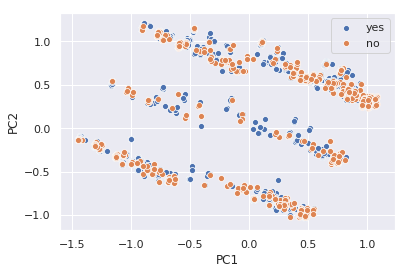

In [0]:
#USING SEABORN PACKAGE FOR PLOTTING
sns.scatterplot(ycomp1,ncomp1)
sns.scatterplot(ycomp2,ncomp2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(["yes",'no'])

# Supervised learning

In [0]:
#SPLITTING NORMALIZED DATA FRAME INTO 70% AND 30% RATIO
train, test = df4.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1535
Test Dataset Count: 646


## Logistic Regression Model

In [0]:
#IMPORTING PACKAGES FOR LOGISTIC REGRESSION
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

#FITTING A LOGISTIC REGRESSION MODEL TO TRAIN DATA USING NORMALIZED FEATURES
lr = LogisticRegression(featuresCol = 'features_SCALED', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)



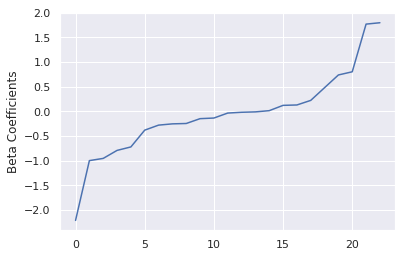

In [0]:
#SORTING AND PLOTTING ALL THE 23 COEFFICIENTS OF THE MODEL
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

#PLOTTING AND LABELLING
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [0]:
#PRINTING COEFFICIENTS AND INTERCEPT FOR THE MODEL
print(beta)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

[-2.20864113 -0.99831662 -0.95339901 -0.79153318 -0.72112384 -0.38152836
 -0.28002613 -0.25432405 -0.24689435 -0.14907016 -0.13648435 -0.03572276
 -0.01991325 -0.01189325  0.01281869  0.12005201  0.1279859   0.22068628
  0.47822905  0.73550459  0.79955062  1.76461063  1.79233186]
Coefficients: [0.1279858967464541,0.2206862792770359,-0.011893248926374198,0.47822904506731306,-0.38152836223301295,-0.14907015906498416,-0.9983166197231241,-0.7915331838368208,0.12005201083032536,0.79955061890892,0.012818691688913506,-0.019913248734469282,-0.03572275995020695,-0.13648435391739383,-0.28002612881879213,-0.9533990130694295,-0.7211238392929601,1.7646106296301638,-0.24689435416456038,-2.208641130191288,1.7923318642369326,0.7355045881923331,-0.2543240478776251]
Intercept: -0.7724553520203608


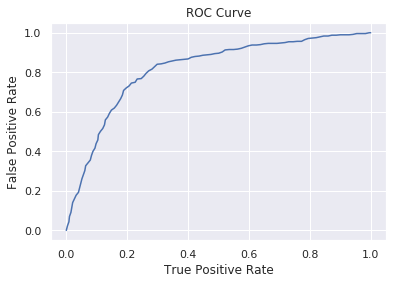

Training set areaUnderROC: 0.8157251493753394


In [0]:
#CALCULATING ROC AND PLOTTING IT
#USING SUMMARY FUNCTION TO GET ALL THE PARAMETERS
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

BETTER THE ROC BETTER THE MODEL

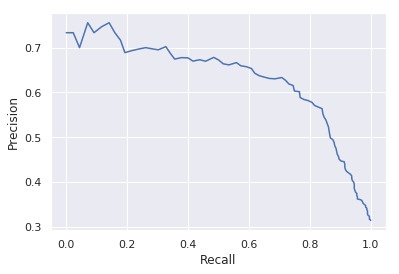

In [0]:
#PLOTTING RECALL VS PRECISION GRAPH
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [0]:
#CALCULATING PREDICTION AND PROBABILITY FOR ALL THE FEATURES
predictionsLR = lrModel.transform(test)
predictionsLR.select( 'features','label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|(23,[0,10,12,14,1...|  1.0|[0.97707051817156...|       0.0|[0.72652655654580...|
|(23,[0,10,12,14,1...|  1.0|[-0.0065387902939...|       1.0|[0.49836530825088...|
|(23,[0,10,12,14,1...|  1.0|[-0.2574143765963...|       1.0|[0.43599941758942...|
|(23,[0,10,13,14,1...|  1.0|[0.95904326052949...|       0.0|[0.72293020905775...|
|(23,[0,10,13,14,1...|  1.0|[0.03490368516321...|       0.0|[0.50872503552337...|
|(23,[0,10,13,14,1...|  1.0|[0.46895053038071...|       0.0|[0.61513533094751...|
|(23,[0,10,13,14,1...|  1.0|[0.60055191529877...|       0.0|[0.64578256559503...|
|(23,[0,10,13,14,1...|  1.0|[0.64883091836999...|       0.0|[0.65674696446277...|
|(23,[0,10,13,14,1...|  1.0|[1.16421802735183...|       0.0|[0.76209830734348...|
|(23,[0,10,13,14

In [0]:
#USING BINARYCLASS EVALUATOR FOR TEST AREA UNDER ROC CALCULATION
#DEFAULT METRIC FOR BINARY CLASS IS AREA UNDER ROC

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictionsLR))

Test Area Under ROC 0.7884659246419102


In [0]:
#PRINTING ONLY LABEL AND PREDICTION FOR ACCURACY CALCULATION
accdf=predictions.select("label","prediction").show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
+-----+----------+
only showing top 5 rows



In [0]:
#MULTICLASS EVALUATOR FOR ACCURACY USING PREDICTION AND LABEL COLUMNS
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

my_eval1 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc = my_eval1.evaluate(predictionsLR)
print("accuracy=%g" %(acc))

accuracy=0.741486


In [0]:
#CALCULATING CONFUSION MATRIX OF THE LR MODEL USING MULTICLASS METRICS
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=predictionsLR.select( 'label', 'prediction').rdd
metrics = MulticlassMetrics(predandlabel)
print(metrics.confusionMatrix())

DenseMatrix([[372.,  87.],
             [ 80., 107.]])


In [0]:
#METRICS FOR PRECISION, RECALL AND F1SCORE
cm=metrics.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Logistic regression:precision,recall,f1score",precision,recall,f1score)

Logistic regression:precision,recall,f1score 0.8230088495575221 0.8104575163398693 0.8166849615806805


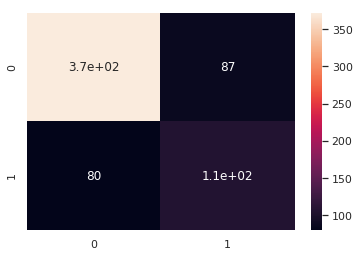

In [0]:
#PLOTTING HEATMAP OF ALL THE METRICS PARAMETERS USING SEABORN PACKAGE
import seaborn as sns
sns.heatmap(cm, annot=True)

## Decision Tree Model

In [0]:
#IMPORTING PACKAGE FOR DECISION TREE MODEL
#FITTING TRAIN AND TEST DATA USING FEATURES AND LABEL COLUMNS
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions1 = dtModel.transform(test)
predictions1.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+-------------+----------+--------------------+
|label|rawPrediction|prediction|         probability|
+-----+-------------+----------+--------------------+
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[171.0,311.0]|       1.0|[0.35477178423236...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0|[233.0,109.0]|       0.0|[0.68128654970760...|
|  1.0| [626.0,58.0]|       0.0|[0.91520467836257...|
+-----+-------------+----------+--------------------+
only showing top 10 rows



In [0]:
#CALCULATING AREA UNDER ROC
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions1, {evaluator.metricName: "areaUnderROC"})))

In [0]:
#CALCULATING ACCURACY USING MULTICLASS EVALUATOR
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

my_eval2 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc = my_eval2.evaluate(predictions1)
print("accuracy=%g" %(acc))

accuracy=0.758514


In [0]:
#PRINTING CONFUSION MATRIX FOR DECISION TREE MODEL
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=predictions1.select( 'label', 'prediction').rdd
metrics1 = MulticlassMetrics(predandlabel)
print(metrics1.confusionMatrix())

DenseMatrix([[374.,  78.],
             [ 78., 116.]])


In [0]:
#METRICS FUNCTION TO EVALUATE RECALL, PRECISION AND F1SCORE
cm=metrics1.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Decision Tree:precision,recall,f1score",precision,recall,f1score)

Decision Tree:precision,recall,f1score 0.827433628318584 0.827433628318584 0.827433628318584


In [0]:
#PRINTING ALL THE IMPORTANT FEATURES
dtModel.featureImportances

SparseVector(23, {1: 0.0073, 15: 0.2049, 17: 0.7084, 21: 0.0682, 22: 0.0111})

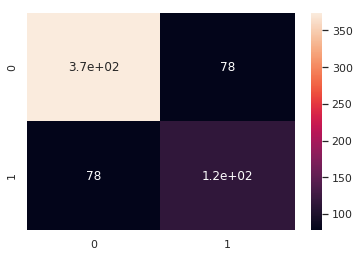

In [0]:
#PLOTTING METRICS AS SEABORN
import seaborn as sns
sns.heatmap(cm, annot=True)

## Naive Bayes Model

In [0]:
#IMPORTING NAIVE BAYES PACKAGE
from pyspark.ml.classification import NaiveBayes

#SELECTING NORMALIZED COLUMNS FOR MODELLING
nbdf=predictions.select('label','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED',"prediction")

In [0]:
#RENAMING SCALED FEATURES COLUMN TO 'FEATURES' FOR NAIVE BAYES MODEL 
nbdf = nbdf.selectExpr("label as label","features_SCALED as features")
nbdf.show(3)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[0.0,0.0,0.0,0.0,...|
|  0.0|[0.0,1.0,0.0,0.0,...|
|  0.0|[0.0,0.0,1.0,0.0,...|
+-----+--------------------+
only showing top 3 rows



In [0]:
#SPLITTING THE LABEL AND FEATURES DATA AS TRAIN AND TEST DATA
trainbn, testnb = nbdf.randomSplit([0.7, 0.3], seed = 742)

In [0]:
#APPLYTING NAIVE BAYES AND FITTING INTO TEST AND TRAIN DATA
#USING MULTINOMIAL METHOD BECAUSE BERNOULLI REQUIRES ONLY BINARY INPUT
nb1=NaiveBayes(modelType="multinomial")
nbmodel=nb1.fit(trainbn)
nb_predictions=nbmodel.transform(testnb)

nb_evaluator=MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

#EVALUATING PREDICTION AND PROBABILITY VALUES
nb_accuracy=nb_evaluator.evaluate(nb_predictions)
nb_predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)


print("Test Area Under ROC: " + str(evaluator.evaluate(nb_predictions, {evaluator.metricName: "areaUnderROC"})))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[-9.6008107488005...|       0.0|[0.84504135311665...|
|  0.0|[-11.427952673484...|       0.0|[0.80665304676501...|
|  0.0|[-14.679711452675...|       0.0|[0.70903283123877...|
|  0.0|[-13.994168052050...|       0.0|[0.70022497296077...|
|  0.0|[-14.966480685945...|       0.0|[0.69716901977295...|
|  0.0|[-15.151005970029...|       0.0|[0.70958685126402...|
|  0.0|[-14.744597017883...|       0.0|[0.87749325966276...|
|  0.0|[-15.599029269868...|       0.0|[0.76260701635110...|
|  0.0|[-16.470167775865...|       1.0|[0.43421396803255...|
|  0.0|[-18.599435781766...|       1.0|[0.30836133714234...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows

Test Area Under ROC: 0.5859487734487734


In [0]:
#CALCULATING ACCURACY
print("accuracy=%g" %(nb_accuracy))

accuracy=0.744582


In [0]:
#PRINTING CONFUSION MATRIX FOR NAIVE BAYES MODEL
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=nb_predictions.select( 'label', 'prediction').rdd
metrics2 = MulticlassMetrics(predandlabel)
print(metrics2.confusionMatrix())

DenseMatrix([[396., 113.],
             [ 52.,  85.]])


In [0]:
#CALCULATING PRECISION, RECALL AND F1SCORE
cm2=metrics2.confusionMatrix().toArray()
precision=(cm2[0][0])/(cm2[0][0]+cm2[1][0])
recall=(cm2[0][0])/(cm2[0][0]+cm2[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("NAIVE BAYES:precision,recall,f1score",precision,recall,f1score)

NAIVE BAYES:precision,recall,f1score 0.8839285714285714 0.7779960707269156 0.8275862068965517


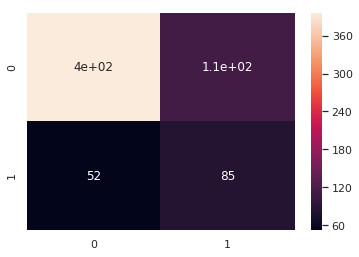

In [0]:
#PLOTTING METRICS VALUE IN SEABORN
import seaborn as sns
sns.heatmap(cm2, annot=True)